### Workshop - Decision Trees

This workshop deals with understanding the working of decision trees.

### Author: Xaltius Pte. Ltd.
Copyright Xaltius Pte. Ltd., 2018

**Not for distribution.**

In [4]:
# Importing libraries in Python
import sklearn.datasets as datasets
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import os
import pandas as pd
import sys, os

os.chdir(r'C:\Users\ushag\OneDrive\DataScience')

df_iris=pd.read_csv('Iris.csv',encoding='ISO-8859-1')

#Loading the iris dataset
#iris=datasets.load_iris()

# Forming the iris dataframe

#df_iris=pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
df_iris.reset_index(inplace=True)

In [6]:
df_iris.shape

(150, 7)

In [7]:
df_iris.isnull().sum()

index            0
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
df_iris
df_iris.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder ()
df_iris.Species=le.fit_transform (df_iris.Species)
df_iris

,index,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0,1,5.1,3.5,1.4,0.2,0
1,1,2,4.9,3.0,1.4,0.2,0
2,2,3,4.7,3.2,1.3,0.2,0
3,3,4,4.6,3.1,1.5,0.2,0
4,4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...,...
145,145,146,6.7,3.0,5.2,2.3,2
146,146,147,6.3,2.5,5.0,1.9,2
147,147,148,6.5,3.0,5.2,2.0,2
148,148,149,6.2,3.4,5.4,2.3,2


In [10]:
#Select the predictor feature and the target variable
X = df_iris.values[:,2:6]#all rows from 0 to 3 columns
y = df_iris.values[:,-1]
print(X)
print(y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [11]:
#Train 70% : 30% test
from sklearn import model_selection
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [12]:
#Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
dec_tree = tree.DecisionTreeClassifier()
dec_tree.fit(X_train, y_train)


DecisionTreeClassifier()

In [13]:
# use the model to make predictions with the test data
dtree=tree.DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)
print(y_pred)

[2. 0. 2. 0. 2. 2. 0. 0. 2. 0. 0. 2. 0. 0. 2. 1. 1. 2. 2. 2. 2. 0. 2. 0.
 1. 2. 1. 0. 1. 2. 1. 1. 1. 0. 0. 1. 0. 1. 2. 2. 0. 1. 2. 2. 0.]


In [14]:
#Model parameters study: how did our model perform?
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 2
Accuracy: 0.96


In [15]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Decision Tree Accuracy Score -> ",accuracy_score(y_pred,y_test)*100)
print("Confusion Matrix\n",confusion_matrix(y_pred,y_test))

Decision Tree Accuracy Score ->  95.55555555555556
Confusion Matrix
 [[16  0  0]
 [ 0 10  1]
 [ 0  1 17]]


In [16]:
from sklearn.metrics import classification_report
target_names = ['0=Iris-setosa','1=Iris-versicolor','2=Iris-virginica']
print(classification_report(y_pred,y_test,target_names=target_names))
data_feature_names=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']

                   precision    recall  f1-score   support

    0=Iris-setosa       1.00      1.00      1.00        16
1=Iris-versicolor       0.91      0.91      0.91        11
 2=Iris-virginica       0.94      0.94      0.94        18

         accuracy                           0.96        45
        macro avg       0.95      0.95      0.95        45
     weighted avg       0.96      0.96      0.96        45



In [17]:
import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
from matplotlib import rcParams # figure size
#from termcolor import colored as cl # text customization

from sklearn.tree import DecisionTreeClassifier as dtc # tree algorithm
from sklearn.model_selection import train_test_split # splitting the data
from sklearn.metrics import accuracy_score # model precision
from sklearn.tree import plot_tree # tree diagram

In [18]:
#Decision Tree Plotting
import sklearn.datasets as datasets
from sklearn.tree import DecisionTreeClassifier

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

data_class_names   = ['setosa', 'versicolor', 'virginica']


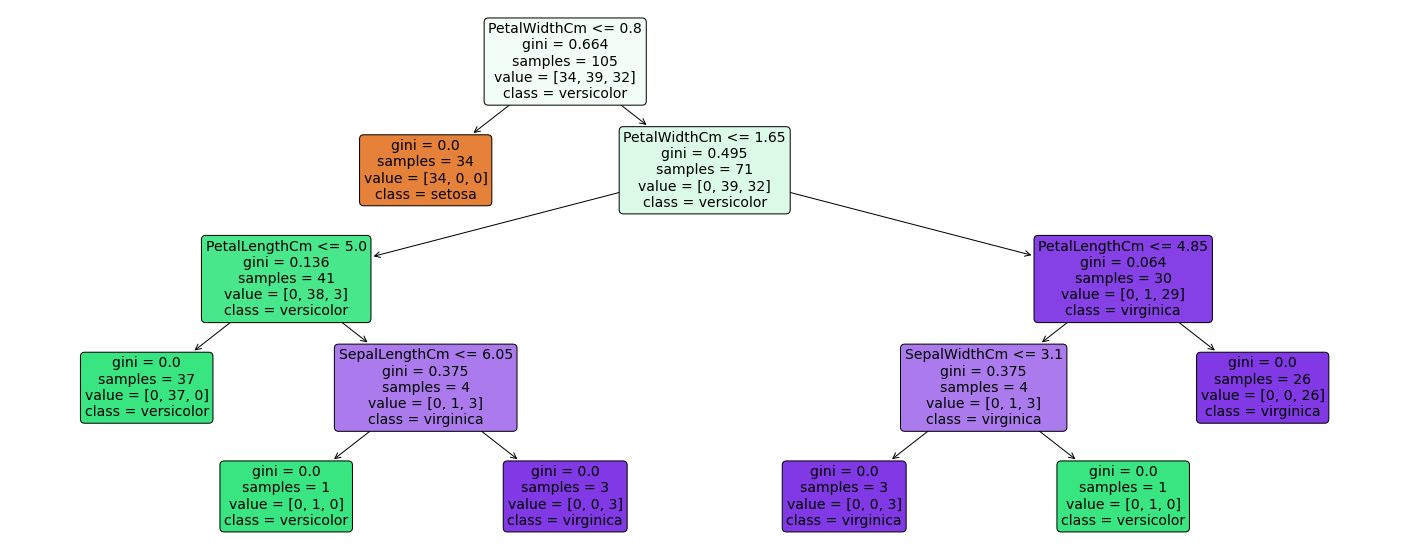

In [19]:
#Decision Tree Plotting
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(25,10))
a = plot_tree(dtree, 
              feature_names=data_feature_names, 
              class_names=data_class_names, 
              filled=True, 
              rounded=True, 
              fontsize=14)

In [20]:
dtree_gini=DecisionTreeClassifier(criterion="gini",random_state=100,max_depth=3,min_samples_leaf=5)
dtree_gini.fit(X_train,y_train)
y_pred_gini = dtree_gini.predict(X_test)
print(accuracy_score(y_test,y_pred_gini))
print(y_pred_gini)

0.9555555555555556
[2. 0. 2. 0. 2. 2. 0. 0. 2. 0. 0. 2. 0. 0. 2. 1. 1. 2. 2. 2. 2. 0. 2. 0.
 1. 2. 1. 0. 1. 2. 1. 1. 1. 0. 0. 1. 0. 1. 2. 2. 0. 1. 2. 2. 0.]


In [21]:
dtree_entropy=DecisionTreeClassifier(criterion='entropy',random_state=100,max_depth=3,min_samples_leaf=5)
dtree_entropy.fit(X_train,y_train)
y_pred_entropy = dtree_entropy.predict(X_test)
print(accuracy_score(y_test,y_pred_entropy))
print(y_pred_entropy)

0.9555555555555556
[2. 0. 2. 0. 2. 2. 0. 0. 2. 0. 0. 2. 0. 0. 2. 1. 1. 2. 2. 2. 2. 0. 2. 0.
 1. 2. 1. 0. 1. 2. 1. 1. 1. 0. 0. 1. 0. 1. 2. 2. 0. 1. 2. 2. 0.]


In [27]:
#print("Confusion Matrix: ",confusion_matrix(y_pred,y_test))
#print("Accuracy: ",accuracy_score(y_pred,y_test)*100,"\n")
#print("Report: ",classification_report(y_test,y_pred))

### Let us visualize the Decision Tree to understand it better.



In [22]:
# Install required libraries
!pip install pydotplus
!apt-get install graphviz -y

'apt-get' is not recognized as an internal or external command,
operable program or batch file.


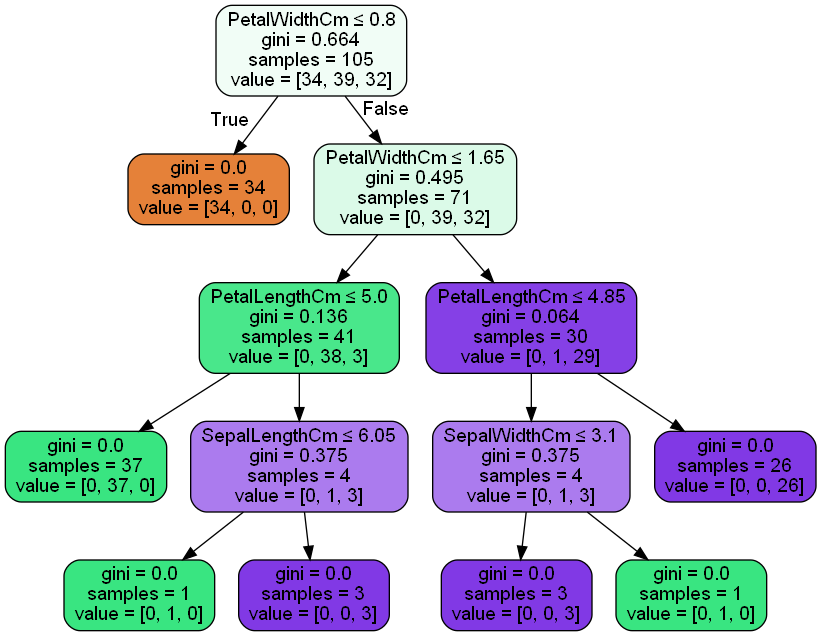

In [23]:
# Import necessary libraries for graph viz
from io import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

# Visualize the graph
#y=df_iris.target
Featre_cols=['SepalLength(Cm)','SepalWidth(Cm)','PetalLength(Cm)','PetalWidth(Cm)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
dtree=DecisionTreeClassifier()
dtree.fit(X_train, y_train)
dot_data = StringIO()

export_graphviz(dtree, out_file=dot_data, feature_names=data_feature_names,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Subcategory.png')
Image(graph.create_png())

**You can now feed any new/test data to this classifer and it would be able to predict the right class accordingly.**